In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### train.csv : 학습 데이터
- id : 샘플 아이디
- age : 나이
- workclass : 일 유형
- fnlwgt : CPS(Current Population Survey) 가중치
- education : 교육수준
- education.num : 교육수준 번호
- marital.status : 결혼 상태
- occupation : 직업
- relationship : 가족관계
- race : 인종
- sex : 성별
- capital.gain : 자본 이익
- capital.loss : 자본 손실
- hours.per.week : 주당 근무시간
- native.country : 본 국적
- target : 소득 / 0 = <=50K (5만 달러 이하) / 1 = >50K (5만 달러 초과) 

In [2]:
df = pd.read_csv('./src/train.csv')

In [3]:
print(df.shape)
df.head()

(17480, 16)


,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              17480 non-null  int64 
 1   age             17480 non-null  int64 
 2   workclass       15644 non-null  object
 3   fnlwgt          17480 non-null  int64 
 4   education       17480 non-null  object
 5   education.num   17480 non-null  int64 
 6   marital.status  17480 non-null  object
 7   occupation      15637 non-null  object
 8   relationship    17480 non-null  object
 9   race            17480 non-null  object
 10  sex             17480 non-null  object
 11  capital.gain    17480 non-null  int64 
 12  capital.loss    17480 non-null  int64 
 13  hours.per.week  17480 non-null  int64 
 14  native.country  16897 non-null  object
 15  target          17480 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.1+ MB


In [26]:
def check_null(df):    
    total_cnt = 0
    for i in df.columns:
        cnt = sum(df[i].isnull())
        total_cnt += cnt
        if cnt:
            print(f'{i}열에 결측치{cnt}개')
        else:
            print(f'{i}열에 결측치 없음')
    if total_cnt == 0:
        print('모든열에 결측치 없음')
check_null(df)

id열에 결측치 없음
age열에 결측치 없음
workclass열에 결측치1836개
fnlwgt열에 결측치 없음
education열에 결측치 없음
education.num열에 결측치 없음
marital.status열에 결측치 없음
occupation열에 결측치1843개
relationship열에 결측치 없음
race열에 결측치 없음
sex열에 결측치 없음
capital.gain열에 결측치 없음
capital.loss열에 결측치 없음
hours.per.week열에 결측치 없음
native.country열에 결측치583개
target열에 결측치 없음


In [62]:
def check_unique(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            print(f'{i}열 unique값:', end=' ')
            for j in df[i].unique():
                print(j, end=', ')
            print()
            print('=======================')
check_unique(df)

workclass열 unique값: Private, State-gov, Local-gov, Self-emp-not-inc, Self-emp-inc, Federal-gov, Without-pay, nan, Never-worked, 
education열 unique값: Assoc-acdm, Some-college, Bachelors, HS-grad, Prof-school, 10th, 11th, Masters, 7th-8th, 1st-4th, Assoc-voc, 5th-6th, Doctorate, 9th, 12th, Preschool, 
marital.status열 unique값: Married-civ-spouse, Never-married, Divorced, Separated, Married-AF-spouse, Married-spouse-absent, Widowed, 
occupation열 unique값: Craft-repair, Exec-managerial, Adm-clerical, Prof-specialty, Machine-op-inspct, Other-service, Sales, Farming-fishing, Transport-moving, Handlers-cleaners, Tech-support, Protective-serv, Priv-house-serv, Armed-Forces, nan, 
relationship열 unique값: Husband, Own-child, Not-in-family, Unmarried, Wife, Other-relative, 
race열 unique값: White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, 
sex열 unique값: Male, Female, 
native.country열 unique값: United-States, Poland, Mexico, Ireland, Guatemala, Dominican-Republic, Greece, El-Salvador, Portug

In [4]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]

In [5]:
print(df0.shape)
df0.head()

(13374, 16)


,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
5,5,33,Private,41610,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0


In [6]:
print(df1.shape)
df1.head()

(4106, 16)


,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
6,6,40,State-gov,40024,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,38,United-States,1
13,13,51,Private,43354,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,1
18,18,27,Private,234664,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
21,21,58,Private,31732,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,1


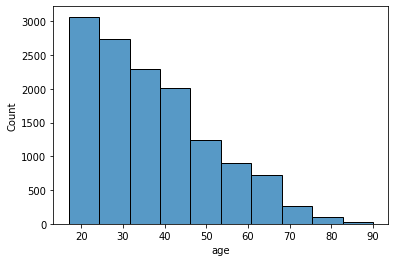

In [17]:
sns.histplot(df0['age'], bins=10)
plt.show()

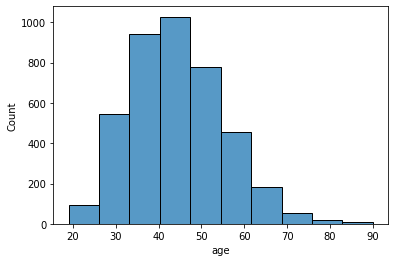

In [18]:
sns.histplot(df1['age'], bins=10)
plt.show()